In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

## Worst case
- simple logistic model for cumulative infected
- growth only restricted by carrying capacity
- carrying capacity: Estimated in literature, around 70%

In [4]:
def logistic(I, t, r):
    k, N = constants
    return r*I*(1 - I/(k * N))

In [71]:
I0 = 100
r = .3
constants = [0.7, 8e7]

t = np.linspace(0, 90, 90)
sol = odeint(logistic, I0, t, args=(r,))
sol = np.squeeze(sol)

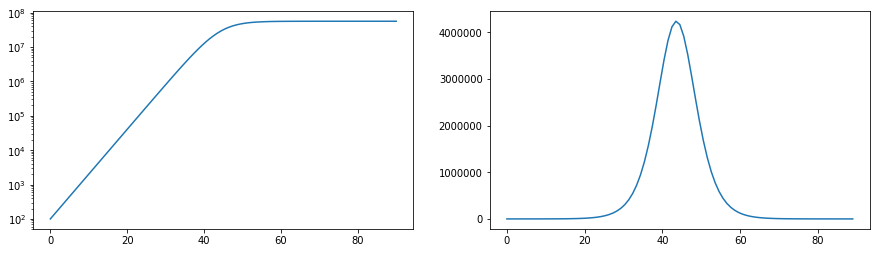

In [81]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.semilogy(t, sol)
plt.subplot(122)
plt.plot(t[:-1], np.diff(sol));

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


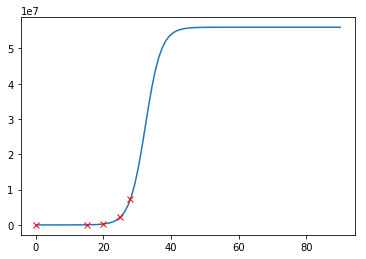

In [112]:
# make up some example data and fit the logistic model to it
t_data = np.array([0, 15, 20, 25, 28])
ex_data = I0*np.exp(0.4*t_data)

# for fitting define function that returns ode solution
def fitfunc(t, r, I0):
    sol = odeint(logistic, I0, t, args=(r,))
    return np.squeeze(sol)

# fit 
pars, cov = curve_fit(fitfunc, t_data, ex_data, p0=[0.25, 100])

plt.plot(t, fitfunc(t, *pars))
plt.plot(t_data, ex_data, 'rx');

- "The initial value point should be the first element of this sequence. (t)"
- To fit real data, t offset and y offset may be required
- For infection data in exponential domain, fit last few datapoints for smooth transition. Will this work for data closer to carrying capacity?